# Bias Variance Tradeoff + More Overfitting

When modelling, we are trying to create a useful prediction that can help us in the future. When doing this, we have seen how we need to create a train test split in order to keep ourselves honest in tuning our model to the data itself. Another perspective on this problem of overfitting versus underfitting is the bias variance tradeoff. We can decompose the mean squared error of our models in terms of bias and variance to further investigate.

$ E[(y-\hat{f}(x)^2] = Bias(\hat{f}(x))^2 + Var(\hat{f}(x)) + \sigma^2$
  
  
$Bias(\hat{f}(x)) = E[\hat{f}(x)-f(x)]$  
$Var(\hat{f}(x)) = E[\hat{f}(x)^2] - \big(E[\hat{f}(x)]\big)^2$

<img src="./images/bias_variance.png" alt="Drawing" style="width: 500px;"/>

## 1. Split the data into a test and train set.

In [2]:
import pandas as pd
df = pd.read_excel('./movie_data_detailed_with_ols.xlsx')
def norm(col):
    minimum = col.min()
    maximum = col.max()
    return (col-minimum)/(maximum-minimum)
for col in df:
    try:
        df[col] = norm(df[col])
    except:
        pass
X = df[['budget','imdbRating','Metascore','imdbVotes']]
y = df['domgross']
df.head()

,budget,domgross,title,Response_Json,Year,imdbRating,Metascore,imdbVotes,Model
0,0.034169,0.055325,21 &amp; Over,NaN,0.997516,0.839506,0.500000,0.384192,0.261351
1,0.182956,0.023779,Dredd 3D,NaN,0.999503,0.000000,0.000000,0.000000,0.070486
2,0.066059,0.125847,12 Years a Slave,NaN,1.000000,1.000000,1.000000,1.000000,0.704489
3,0.252847,0.183719,2 Guns,NaN,1.000000,0.827160,0.572917,0.323196,0.371052
4,0.157175,0.233625,42,NaN,1.000000,0.925926,0.645833,0.137984,0.231656


In [5]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, y)

## 2. Fit a regression model to the training data.

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0.5, 1.0, 'Model vs Data for Test Set')

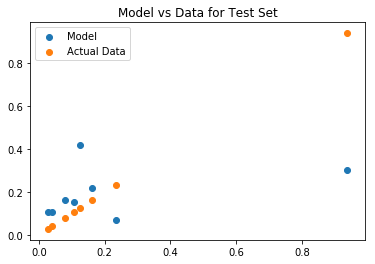

In [9]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
plt.scatter(y_test, linreg.predict(X_test), label='Model')
plt.scatter(y_test, y_test, label='Actual Data')
plt.legend()
plt.title('Model vs Data for Test Set')

## 2b. Plot the training predictions against the actual data. (Y_hat_train vs Y_train)

Text(0.5, 1.0, 'Model vs Data for Training Set')

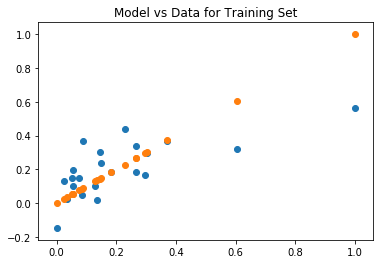

In [11]:
plt.scatter(y_train, linreg.predict(X_train), label='Model')
plt.scatter(y_train, y_train, label='Actual Data')
plt.title('Model vs Data for Training Set')

## 2c. Plot the test predictions against the actual data. (Y_hat_test vs Y_train)

Text(0.5, 1.0, 'Model vs Data for Test Set')

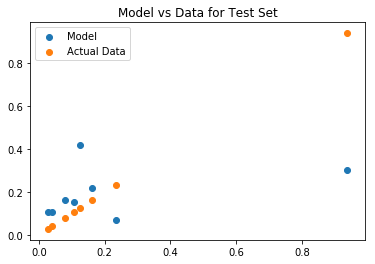

In [10]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
plt.scatter(y_test, linreg.predict(X_test), label='Model')
plt.scatter(y_test, y_test, label='Actual Data')
plt.legend()
plt.title('Model vs Data for Test Set')

## 3. Calculating Bias
Write a formula to calculate the bias of a models predictions given the actual data.   
(The expected value can simply be taken as the mean or average value.)  
$Bias(\hat{f}(x)) = E[\hat{f}(x)-f(x)]$  

In [15]:
import numpy as np
def bias(y, y_hat):
    return np.mean(y_hat - y)

## 4. Calculating Variance
Write a formula to calculate the variance of a model's predictions (or any set of data).  
$Var(\hat{f}(x)) = E[\hat{f}(x)^2] - \big(E[\hat{f}(x)]\big)^2$

In [16]:
def variance(y_hat):
    return np.mean([yi**2 for yi in y_hat]) - np.mean(y_hat)**2 #Your code here

## 5. Us your functions to calculate the bias and variance of your model. Do this seperately for the train and test sets.

In [17]:
b = bias(y_train, linreg.predict(X_train)) #Your code here
v = variance(linreg.predict(X_train)) #Your code here
print('Bias: {} \nVariance: {}'.format(b,v))

Bias: -6.371166220860273e-17 
Variance: 0.024397582713931817


In [18]:
b = bias(y_test, linreg.predict(X_test)) #Your code here
v = variance(linreg.predict(X_test)) #Your code here
print('Bias: {} \nVariance: {}'.format(b,v))

Bias: -0.021666369838078372 
Variance: 0.011874965309526045


## 6. Describe in words what these numbers can tell you.

The training set had far less bias (was more accurate) then the test set. The test set also had more variance

## 7. Overfit a new model by creating additional features by raising current features to various powers.

In [21]:
def add_polynomial_features(X, powers_to_add, max_features):
    orig_columns = X.columns
    for feat in orig_columns:
        for i in powers_to_add:
            X['{}^{}'.format(feat, i)] = X[feat].map(lambda x: x**i)
            if len(X.columns) >= max_features:
                break
        if len(X.columns) >= max_features:
            break
    return X
X_train = add_polynomial_features(X_train, range(2,6), max_features=25)
X_test = add_polynomial_features(X_test, range(2,6), max_features=25)

/opt/conda/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


## 8a. Plot your overfitted model's training predictions against the actual data.

Text(0.5, 1.0, 'Model vs Data for Training Set')

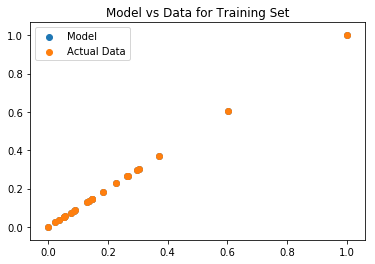

In [22]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
plt.scatter(y_train, linreg.predict(X_train), label='Model')
plt.scatter(y_train, y_train, label='Actual Data')
plt.legend()
plt.title('Model vs Data for Training Set')

## 8b. Calculate the bias and variance for the train set.

In [23]:
b = bias(y_train, linreg.predict(X_train)) #Your code here
v = variance(linreg.predict(X_train)) #Your code here
print('Bias: {} \nVariance: {}'.format(b,v))

Bias: 7.542926195263694e-13 
Variance: 0.04904599581122052


## 9a. Plot your overfitted model's test predictions against the actual data.

In [36]:
#Your code here

## 9b. Calculate the bias and variance for the train set.

In [37]:
#Your code here

## 10. Describe what you notice about the bias and variance statistics for your overfit model.

#Your description here (this cell is formatted using markdown)